In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [3]:
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [4]:
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [11]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [13]:
#Frequency of 'subscribed'
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

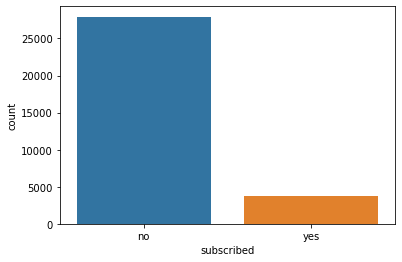

In [14]:
sns.countplot(data=df_train, x='subscribed')

In [15]:
#checking if any feature has only one value
for column in df_train.columns:
    print(column,df_train[column].nunique())

ID 31647
age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


In [16]:
for column in df_test.columns:
    print(column,df_test[column].nunique())

ID 13564
age 75
job 12
marital 3
education 4
default 2
balance 4292
housing 2
loan 2
contact 3
day 31
month 12
duration 1201
campaign 40
pdays 422
previous 33
poutcome 4


As we can see there is no feature with only one value 

In [17]:
categorical_features=[feature for feature in df_train.columns if ((df_train[feature].dtypes=='O') & (feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [18]:
categorical_features=[feature for feature in df_test.columns if ((df_test[feature].dtypes=='O') & (feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

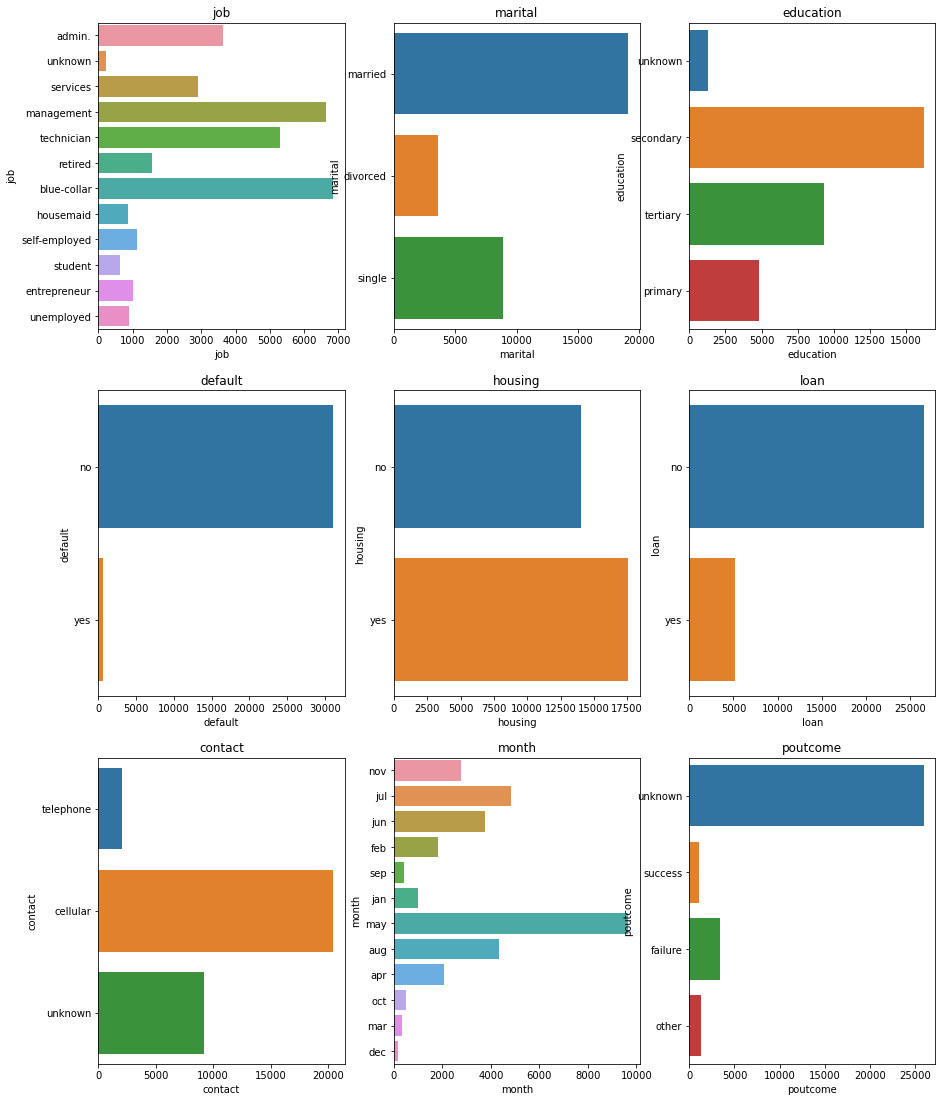

In [19]:
#check count based on categorical features for training Data
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df_train)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

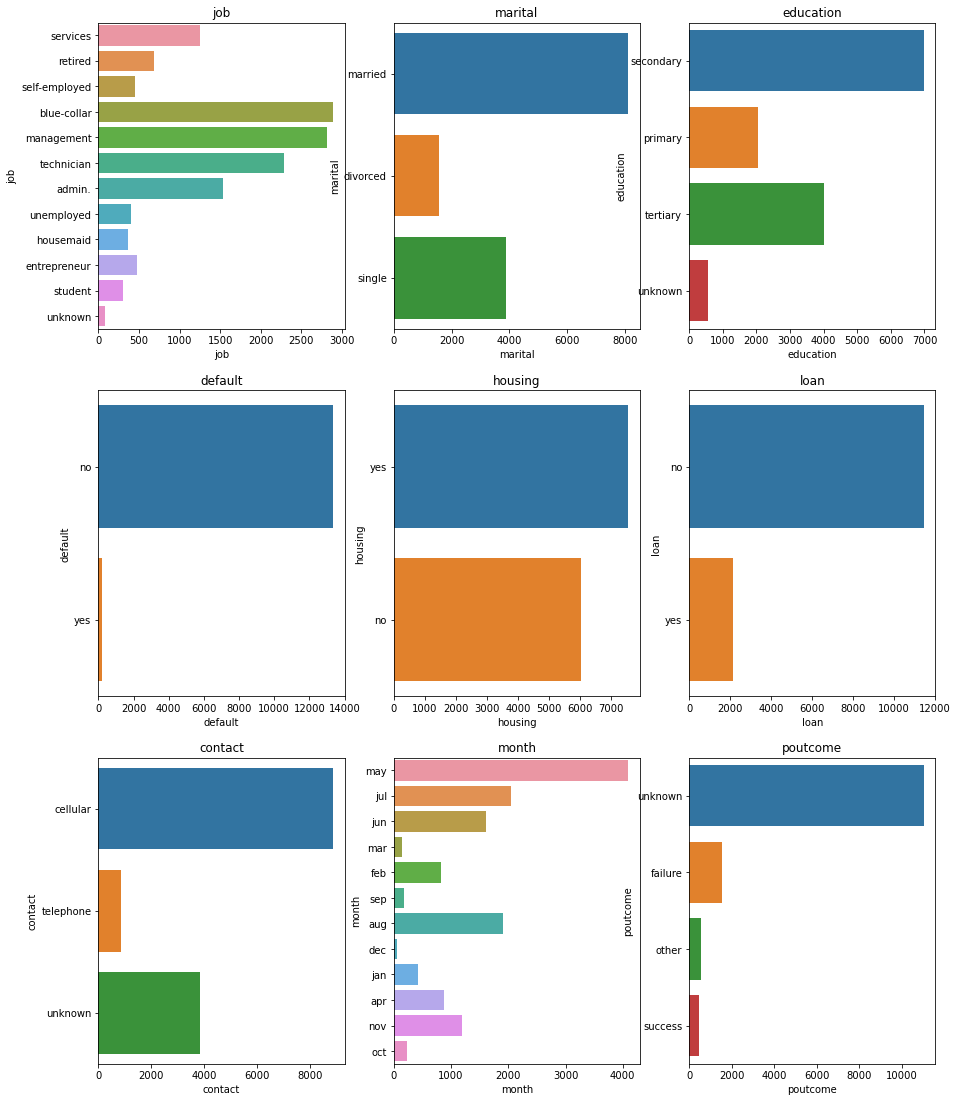

In [20]:
#check count based on categorical features for testing Data
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df_test)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Insight:
client with job type as management records are high in given dataset and housemaid are very less
client who married are high in records in given dataset and divorced are less
client whose education background is secondary are in high numbers in given dataset
defualt feature seems to be does not play important role as it has value of no at high ratio to value yes which can drop
data in month of may is high and less in dec

In [21]:
#Analyzing the Marital count
df_train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [22]:
#Analyzing the Marital count
df_test['marital'].value_counts()

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

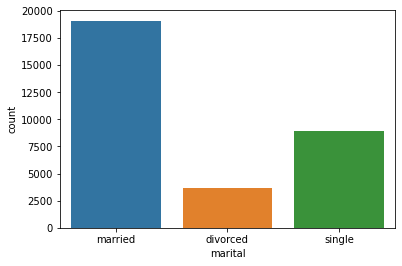

In [23]:
sns.countplot(data=df_train, x='marital');

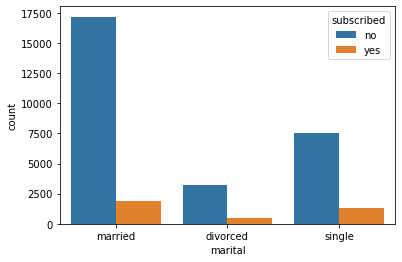

In [24]:
sns.countplot(data=df_train, x='marital', hue='subscribed');

As we can see here that the number of subcription is high with the married client.

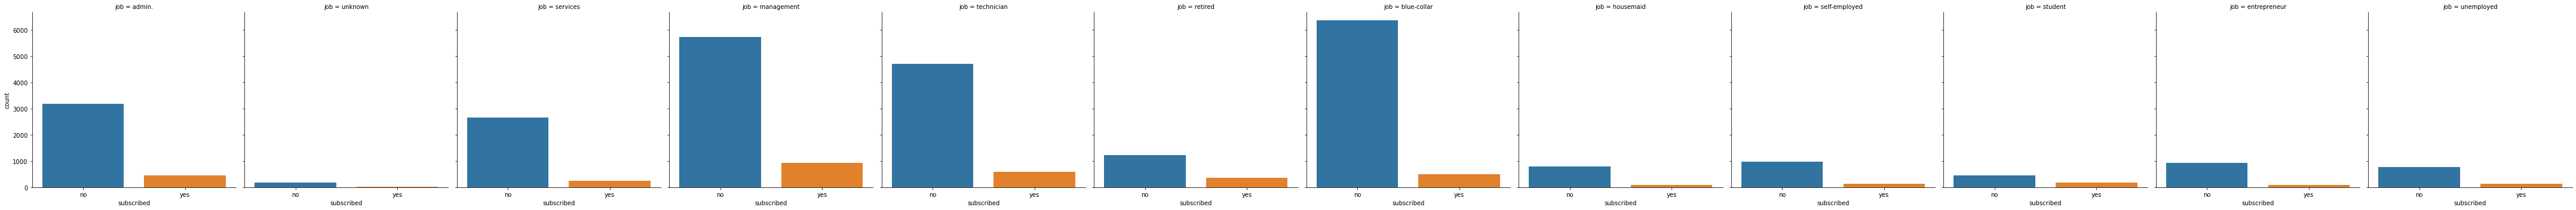

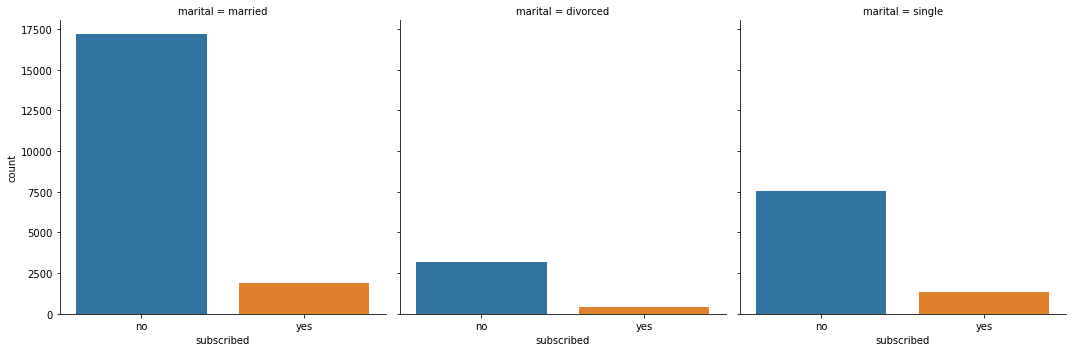

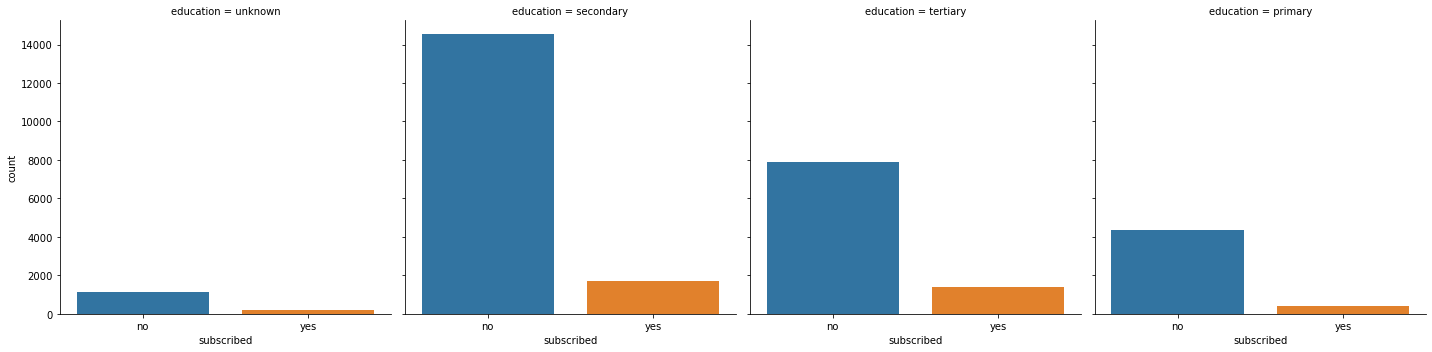

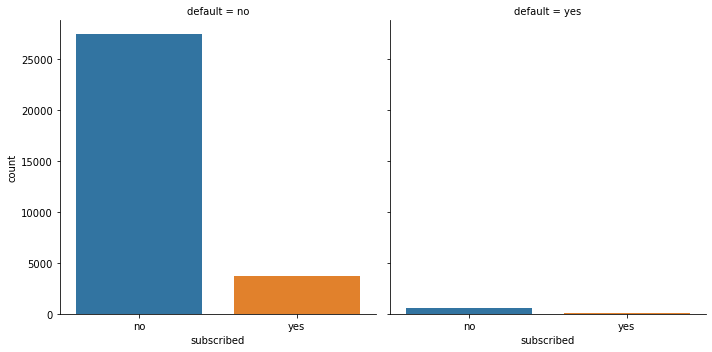

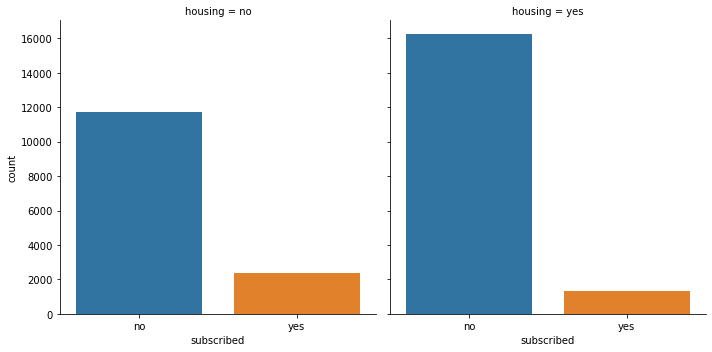

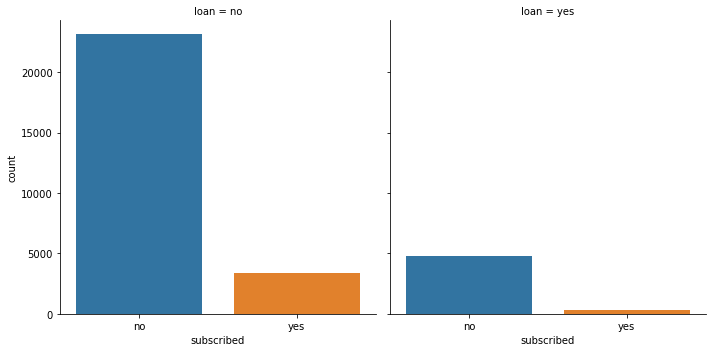

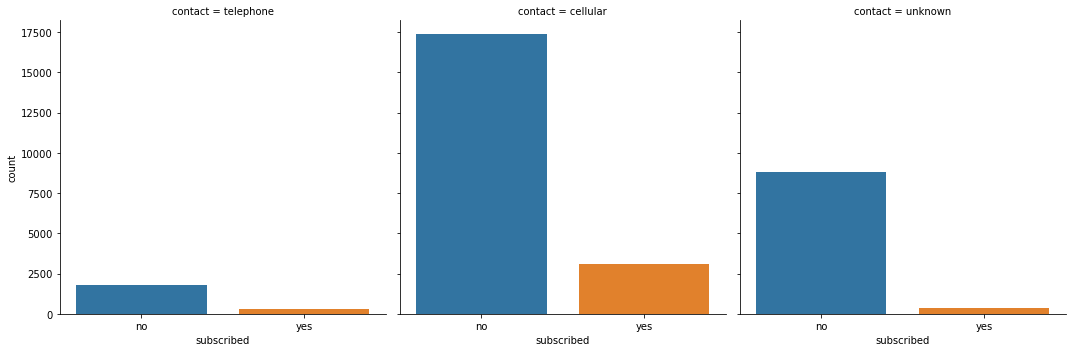

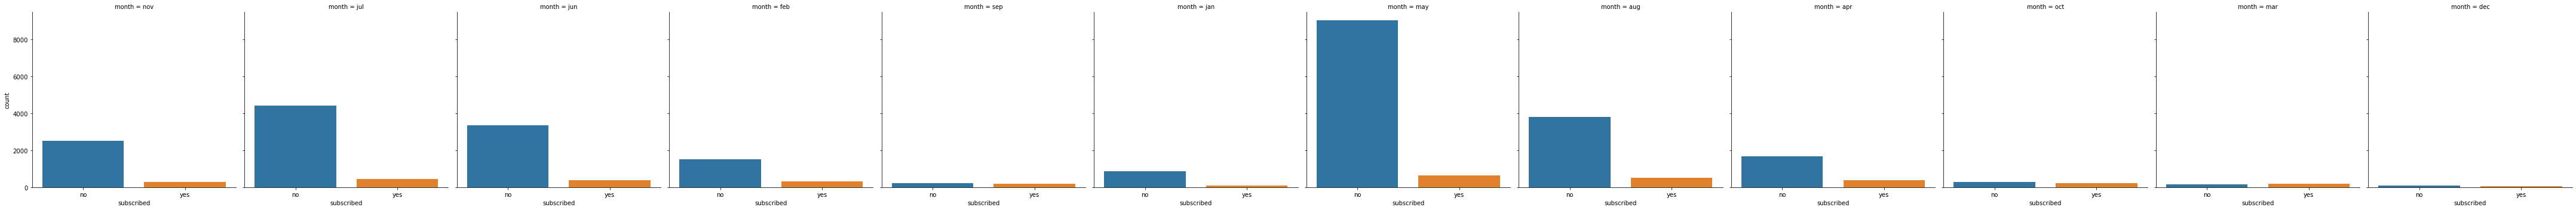

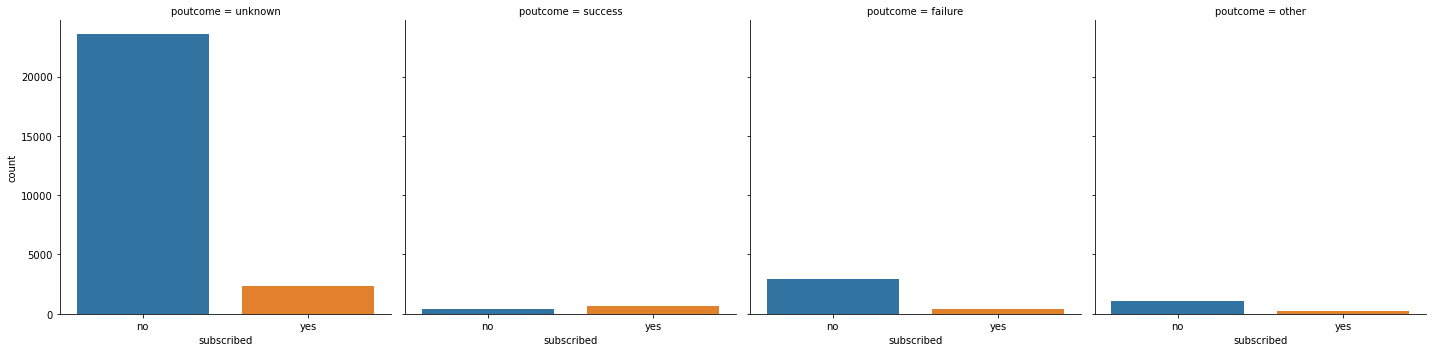

In [25]:
#Relationship between Categorical Features and Label
for categorical_feature in categorical_features:
    sns.catplot(x='subscribed', col=categorical_feature, kind='count', data= df_train)
plt.show()

In [26]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df_train.groupby(['subscribed',categorical_feature]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

In [27]:
#checking the numerical values in our Dataset
# list of numerical variables
numerical_features = [feature for feature in df_train.columns if ((df_train[feature].dtypes != 'O') & (feature not in ['subscribed']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  8


,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0


In [28]:
#Find Discrete Numerical Features
discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [29]:
# Finding Continous Numerical Features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['subscribed']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 8


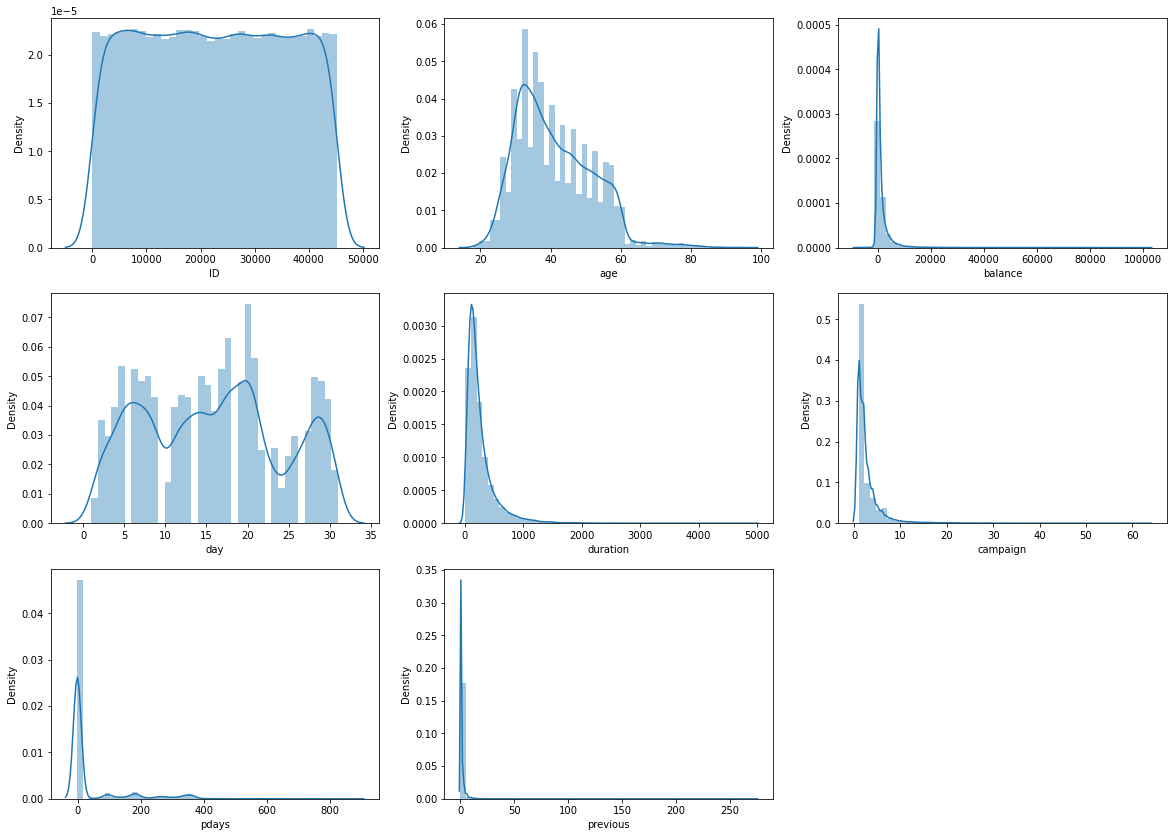

In [30]:
#univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df_train[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

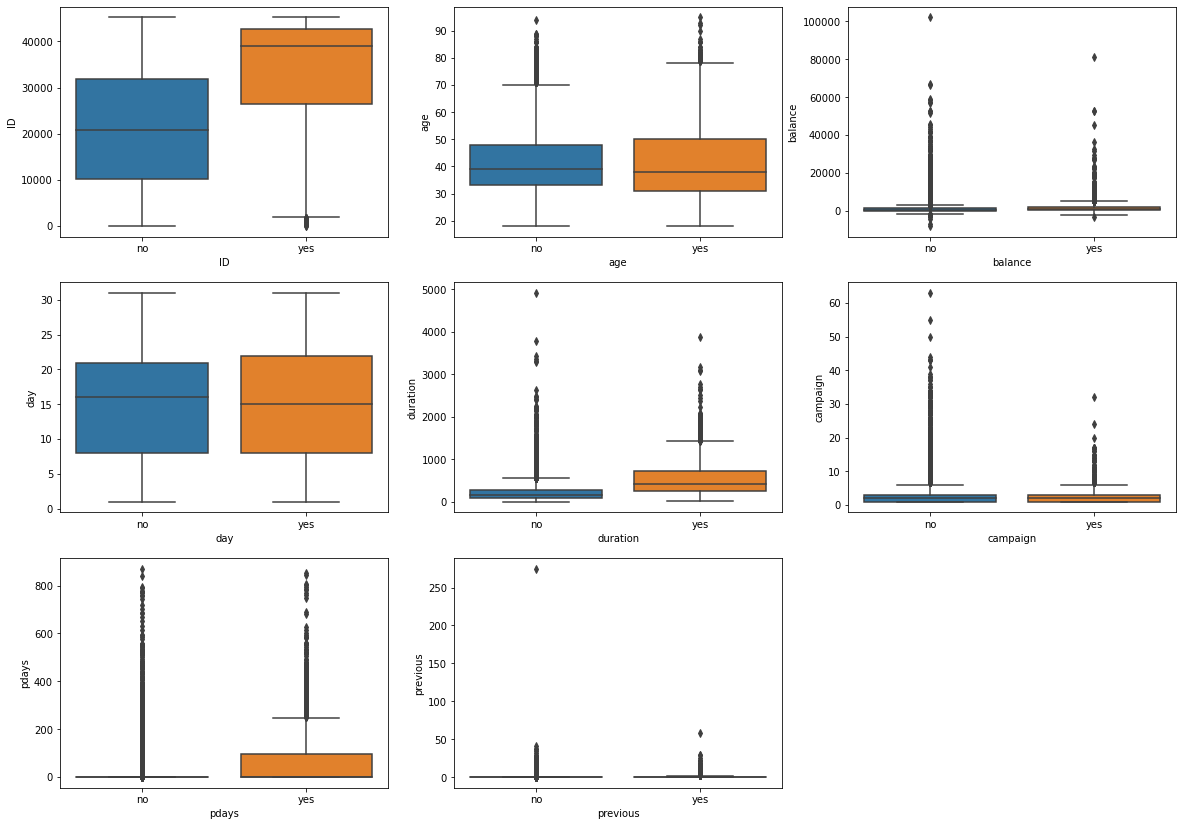

In [31]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="subscribed", y= df_train[feature], data=df_train)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

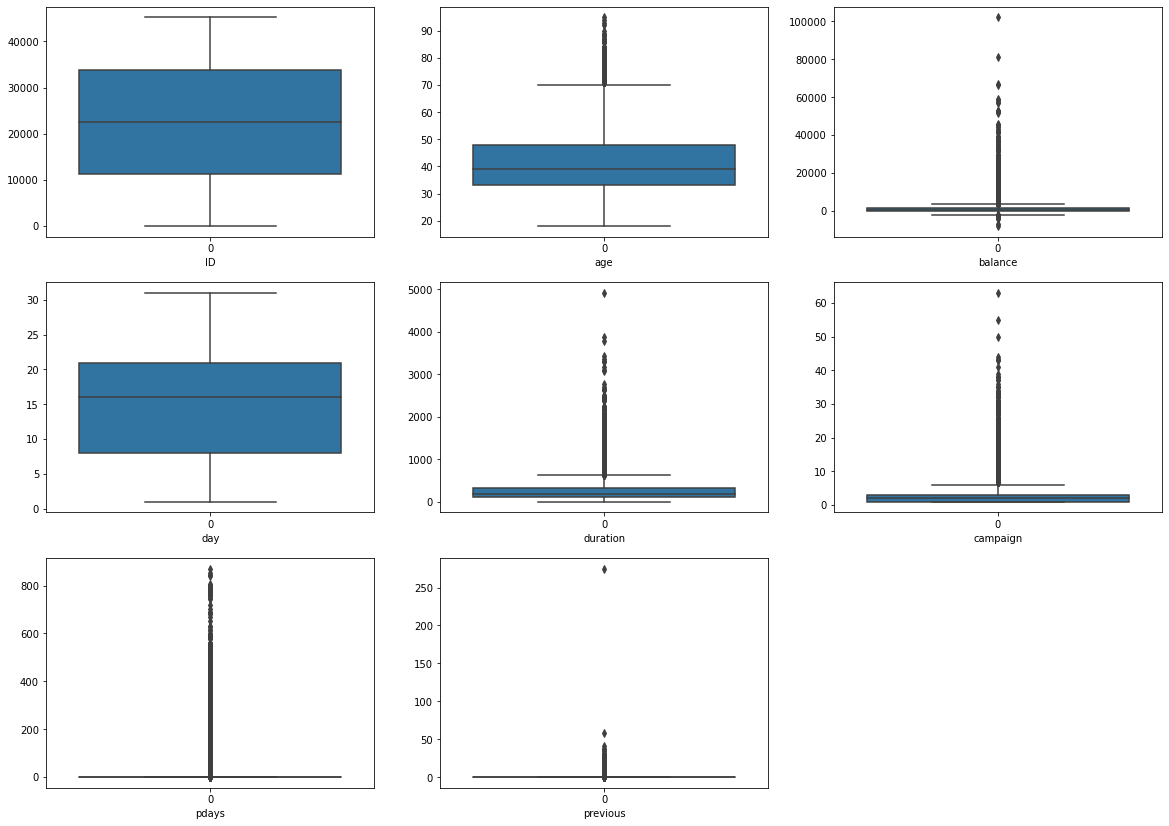

In [32]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

We can see that there are some outliers

In [33]:
# Converting the target variables into 0s and 1s
df_train['subscribed'].replace('no', 0,inplace=True)
df_train['subscribed'].replace('yes', 1,inplace=True)

In [34]:
df_train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [35]:
# Calculating skewness for numerical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
skewness = df_train[numerical_columns].skew()
print("Skewness for numerical columns:")
print(skewness)

Skewness for numerical columns:
ID             0.005851
age            0.681607
balance        7.995696
day            0.087185
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
subscribed     2.377445
dtype: float64


In [36]:
cat_columns = ['job', 'marital', 'education', 'default','contact', 'month', 'poutcome']
for col in  cat_columns:
    df_train[col]=df_train[col].apply(lambda x : 1 if x == 'yes' else 0)


In [37]:
#df_train = pd.concat(df_train.drop(col, axis=1)
#,pd.get_dummies(df_train[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [38]:
bool_columns = ['housing', 'loan']
for col in  bool_columns:
    df_train[col]=df_train[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_train.drop(col, axis=1, inplace=True)

In [39]:
df_train.head()

,ID,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,0,0,0,1933,0,19,0,44,2,-1,0,0,0
1,40576,31,0,0,0,0,3,0,20,0,91,2,-1,0,0,0
2,15320,27,0,0,0,0,891,0,18,0,240,1,-1,0,0,0
3,43962,57,0,0,0,0,3287,0,22,0,867,1,84,3,0,1
4,29842,31,0,0,0,0,119,0,4,0,380,1,-1,0,0,0


In [40]:
#Correlation matrix
corr = df_train.corr()
corr

,ID,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,NaN,NaN,NaN,-0.051521,0.067897,NaN,-0.063399,NaN,0.007183,-0.103508,0.436148,0.254476,NaN,0.296663
age,0.013337,1.000000,NaN,NaN,NaN,-0.016117,0.103245,NaN,-0.011056,NaN,-0.003870,0.005733,-0.021947,0.005761,NaN,0.024538
job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,-0.051521,-0.016117,NaN,NaN,NaN,1.000000,-0.069422,NaN,0.009996,NaN,-0.010849,0.018538,-0.029622,-0.015877,NaN,-0.020168
balance,0.067897,0.103245,NaN,NaN,NaN,-0.069422,1.000000,NaN,0.003461,NaN,0.024274,-0.012032,0.001789,0.013843,NaN,0.050807
contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.063399,-0.011056,NaN,NaN,NaN,0.009996,0.003461,NaN,1.000000,NaN,-0.032288,0.159168,-0.087626,-0.048752,NaN,-0.029600
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


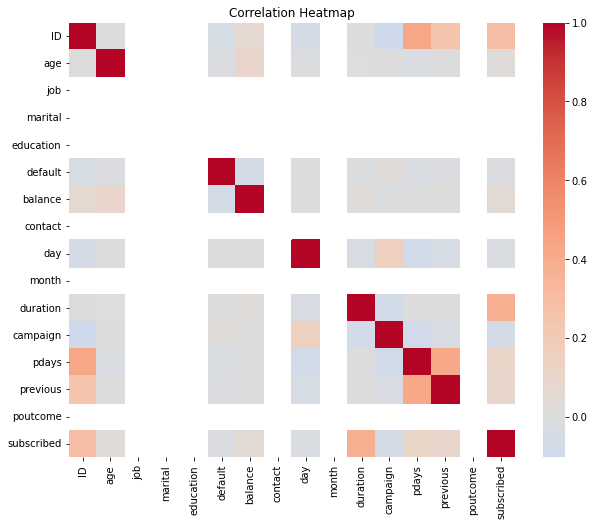

In [41]:
#constructing a heatmap to understand the correlation between the column
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [42]:
X = df_train.drop(['subscribed'],axis=1)
y = df_train['subscribed']

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [45]:
len(X_train)

25317

In [46]:
len(y_train)

25317

In [47]:
a=LogisticRegression()

In [48]:
a = LogisticRegression()
a.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
# predictions on validation data
y_val_pred = a.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

Validation Accuracy: 0.89


In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [52]:
cat_columns = ['job', 'marital', 'education', 'default','contact', 'month', 'poutcome', 'housing', 'loan']
for col in  cat_columns:
    df_test[col]=df_test[col].apply(lambda x : 1 if x == 'yes' else 0)

In [53]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,0,0,0,0,118,1,0,0,15,0,20,6,-1,0,0
1,40403,78,0,0,0,0,2787,0,0,0,1,0,372,1,-1,0,0
2,3709,31,0,0,0,0,144,1,0,0,16,0,676,1,-1,0,0
3,37422,57,0,0,0,0,3777,1,0,0,13,0,65,2,-1,0,0
4,12527,45,0,0,0,0,-705,0,1,0,3,0,111,1,-1,0,0


In [54]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [55]:
import joblib
joblib.dump(a, 'trained_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [56]:
# Ensure the test data columns match the training data columns
missing_columns = set(X_train.columns) - set(df_test.columns)
for column in missing_columns:
    df_test[column] = 0

# Preprocess numerical features
numerical_columns = ['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays']
X_test_numerical = df_test[numerical_columns]


In [57]:
X_test_numerical_scaled = scaler.transform(X_test_numerical)

In [58]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', 'passthrough', cat_columns),
        ('num', StandardScaler(), numerical_columns)
    ])

In [59]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [60]:
x_train_prediction=a.predict(X_test)

In [61]:
print(x_train_prediction)

[1 1 1 ... 1 1 1]


In [62]:
X_test_prediction=a.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, y_test)

In [63]:
print(test_data_accuracy)

0.11548183254344392


In [64]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.91133491 0.90541074 0.90855224 0.90677464 0.89946672]
0.9063078512480501


In [65]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [66]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [67]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.8858657195481967,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.911176312453245,
  'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}}]

In [68]:
input_data= (26110,56,0,0,0,0,1933,0,0,0,19,0,44,2,-1)
#changing the input data to numpy array
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction= a.predict(input_data_reshaped)
print(prediction)

[1]


In [69]:
X_test_scaled = pd.DataFrame(X_test_numerical_scaled, columns=numerical_columns)

In [70]:
test_predictions = a.predict(X_test_scaled)

# Create a DataFrame with the predictions
output = pd.DataFrame({'ID': df_test['ID'], 'Predicted_Subscription': test_predictions})

# Save the predictions to a CSV file
output.to_csv('predictions.csv', index=False)